# 합성곱 신경망(Convolution Neural Network)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의) 
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

## Conv1D 

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

### Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

### MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

### GlobalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터

### 데이터 로드 및 전처리

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)

print(len(input_train))
print(len(input_test))

17465344/17464789 [==============================] - 0s 0us/step
25000
25000


In [ ]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test = pad_sequences(input_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
def build_model():
  model = Sequential()

  model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
  model.add(Conv1D(32, 7, activation='relu'))
  model.add(MaxPooling1D(7))
  model.add(Conv1D(32, 5, activation='relu'))
  model.add(MaxPooling1D(5))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                

### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 2s 14ms/step - loss: 0.6928 - acc: 0.5141 - val_loss: 0.6924 - val_acc: 0.5356
Epoch 2/30
157/157 [==============================] - 2s 12ms/step - loss: 0.6903 - acc: 0.6047 - val_loss: 0.6908 - val_acc: 0.6132
Epoch 3/30
157/157 [==============================] - 2s 12ms/step - loss: 0.6868 - acc: 0.6719 - val_loss: 0.6875 - val_acc: 0.6166
Epoch 4/30
157/157 [==============================] - 2s 12ms/step - loss: 0.6796 - acc: 0.7280 - val_loss: 0.6764 - val_acc: 0.7226
Epoch 5/30
157/157 [==============================] - 2s 12ms/step - loss: 0.6600 - acc: 0.7673 - val_loss: 0.6453 - val_acc: 0.7636
Epoch 6/30
157/157 [==============================] - 2s 12ms/step - loss: 0.6108 - acc: 0.7940 - val_loss: 0.5777 - val_acc: 0.7990
Epoch 7/30
157/157 [==============================] - 2s 12ms/step - loss: 0.5295 - acc: 0.8161 - val_loss: 0.4947 - val_acc: 0.8166
Epoch 8/30
157/157 [==============================] - 2s 12ms/step - 

### 시각화

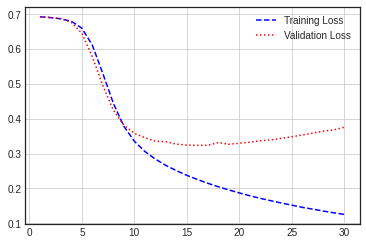

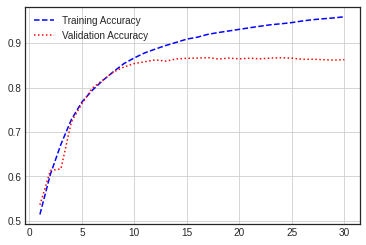

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epoch = range(1, len(loss)+1)

plt.plot(epoch, loss, 'b--', label='Training Loss')
plt.plot(epoch, val_loss, 'r:', label='Validation Loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epoch, acc, 'b--', label='Training Accuracy')
plt.plot(epoch, val_acc, 'r:', label='Validation Accuracy')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.4047 - acc: 0.8441


[0.40470796823501587, 0.8441200256347656]

## Reuters 데이터

### 데이터 로드 및 전처리

In [21]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [22]:
num_words = 10000
max_len = 500

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words = num_words)

print(len(input_train))
print(len(input_test))

8982
2246


In [23]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test = pad_sequences(input_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(8982, 500)
(2246, 500)


### 모델 구성

In [24]:
def build_model():
  model = Sequential()

  model.add(Embedding(input_dim=num_words, output_dim=64, input_length=max_len))
  model.add(Conv1D(64, 7, activation='relu'))
  model.add(MaxPooling1D(7))
  model.add(Conv1D(64, 5, activation='relu'))
  model.add(MaxPooling1D(5))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(46, activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

In [25]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 494, 64)           28736     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 70, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 66, 64)            20544     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 13, 64)            0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)               

### 모델 학습

In [26]:
history = model.fit(pad_x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
57/57 [==============================] - 2s 27ms/step - loss: 2.6277 - acc: 0.3548 - val_loss: 2.0458 - val_acc: 0.4903
Epoch 2/30
57/57 [==============================] - 1s 22ms/step - loss: 1.8408 - acc: 0.5285 - val_loss: 1.7006 - val_acc: 0.5426
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 1.5914 - acc: 0.5910 - val_loss: 1.5557 - val_acc: 0.5999
Epoch 4/30
57/57 [==============================] - 1s 22ms/step - loss: 1.3969 - acc: 0.6512 - val_loss: 1.4406 - val_acc: 0.6461
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 1.1994 - acc: 0.7020 - val_loss: 1.3478 - val_acc: 0.6878
Epoch 6/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9971 - acc: 0.7535 - val_loss: 1.2654 - val_acc: 0.7206
Epoch 7/30
57/57 [==============================] - 1s 22ms/step - loss: 0.8219 - acc: 0.8025 - val_loss: 1.2590 - val_acc: 0.7295
Epoch 8/30
57/57 [==============================] - 1s 22ms/step - loss: 0.6758 - a

### 시각화

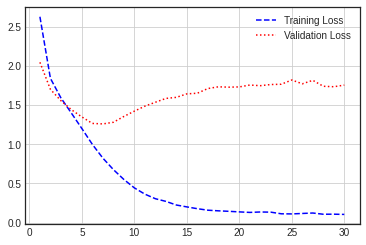

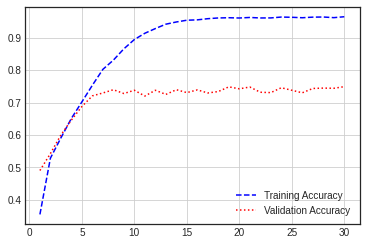

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epoch = range(1, len(loss)+1)

plt.plot(epoch, loss, 'b--', label='Training Loss')
plt.plot(epoch, val_loss, 'r:', label='Validation Loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epoch, acc, 'b--', label='Training Accuracy')
plt.plot(epoch, val_acc, 'r:', label='Validation Accuracy')
plt.grid()
plt.legend()

plt.show()

In [30]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.6870 - acc: 0.7413


[1.6869938373565674, 0.7413179278373718]